In [1]:
import numpy as np
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Raça
breeds = pd.read_csv('datasets/breed_labels.csv')
#Cores
colors = pd.read_csv('datasets/color_labels.csv')
#Estado
states = pd.read_csv('datasets/state_labels.csv')

#Dataset de treino
train = pd.read_csv('datasets/train.csv')
#Dataset de teste
test = pd.read_csv('datasets/test.csv')
#Exemplo do arquivo a ser submetido
sub = pd.read_csv('datasets/sample_submission.csv')

#Dividindo entre teste e treino
train['dataset_type']= 'train'
test['dataset_type']= 'test'

#Concatenando (Para gerar graficos e etc)
all_data = pd.concat([train, test], sort=True)

In [3]:
train.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,dataset_type
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,train
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,train
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,train
3,1,Miko,4,307,0,2,1,2,0,2,...,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,train
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,train


Text(0.5,1,'velocidade de adoção (classe preditora)')

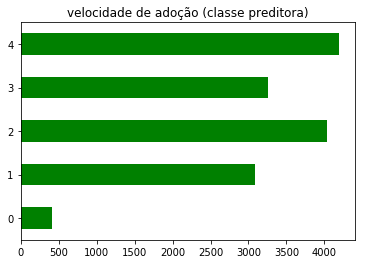

In [4]:
train['AdoptionSpeed'].value_counts().sort_index().plot('barh', color="green")
plt.title('velocidade de adoção (classe preditora)')

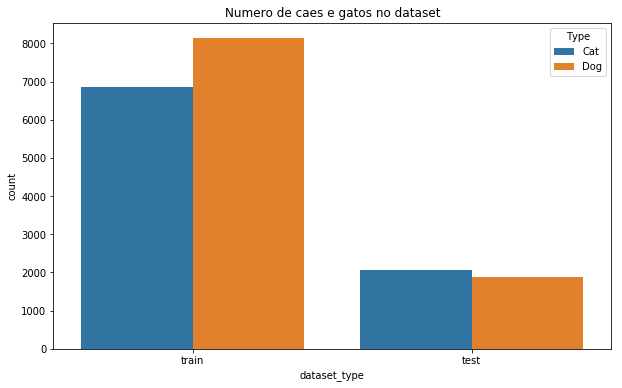

In [5]:
#Verificando a quantidade de gatos e cachorros no dataset
all_data['Type'] = all_data['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
plt.figure(figsize=(10, 6));
sns.countplot(x='dataset_type', data=all_data, hue='Type');
plt.title('Numero de caes e gatos no dataset');

In [6]:
main_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prepare_plot_dict(df, col, main_count):

    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_count_plot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):

    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points')  


In [7]:
train['Name'] = train['Name'].fillna('Unnamed')
test['Name'] = test['Name'].fillna('Unnamed')
all_data['Name'] = all_data['Name'].fillna('Unnamed')

train['No_name'] = 0
train.loc[train['Name'] == 'Unnamed', 'No_name'] = 1
test['No_name'] = 0
test.loc[test['Name'] == 'Unnamed', 'No_name'] = 1
all_data['No_name'] = 0
all_data.loc[all_data['Name'] == 'Unnamed', 'No_name'] = 1

print(f"Porcentagem de animais sem nome no dataset treino: {train['No_name'].sum() * 1000/ train['No_name'].shape[0]:.4f}%.")
print(f"Porcentagem de animais sem nome no dataset teste: {test['No_name'].sum() * 1000 / test['No_name'].shape[0]:.4f}%.")



Porcentagem de animais sem nome no dataset treino: 84.1726%.
Porcentagem de animais sem nome no dataset teste: 76.7477%.


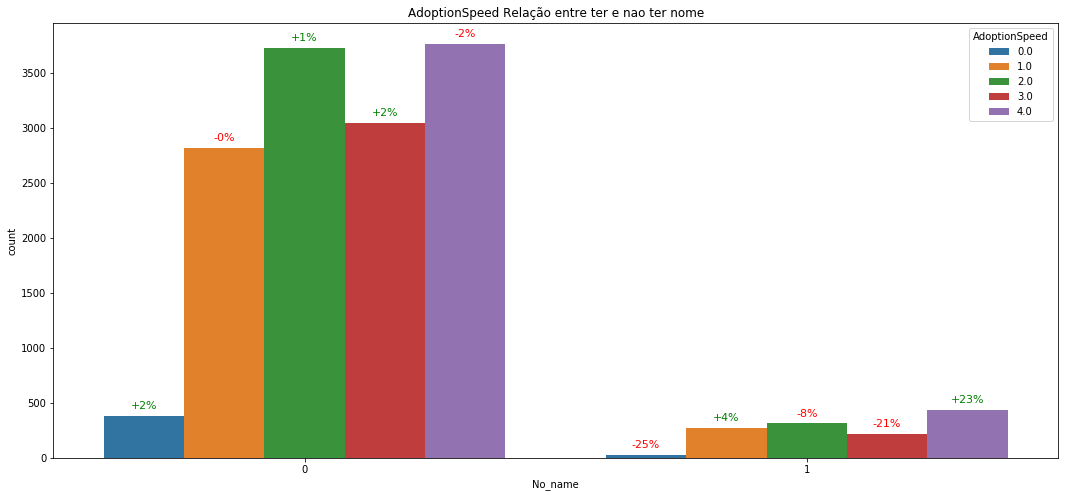

In [8]:
#Aparentemente, um animal sem nome tem menor chance de ser adotado

plt.figure(figsize=(18, 8));
make_count_plot(df=all_data.loc[all_data['dataset_type'] == 'train'], x='No_name', title='Relação entre ter e nao ter nome')